In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
data = pd.read_csv("data.csv", encoding='ISO-8859-1')
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [156]:
data.shape

(525461, 8)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [63]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,525461.0,10.337667,107.424110,-9600.00,1.00,3.0,10.00,19152.00
Price,525461.0,4.688834,146.126914,-53594.36,1.25,2.1,4.21,25111.09
Customer ID,417534.0,15360.645478,1680.811316,12346.00,13983.00,15311.0,16799.00,18287.00


In [65]:
data = data[(data["Quantity"]>0) & (data["Price"]>0)]

In [64]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [68]:
data.shape

(511566, 8)

In [69]:
data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [16]:
# data.head(5).style.highlight_max(color = 'aqua', axis = 0)

In [70]:
type(data['InvoiceDate'][0])

str

In [71]:
# 12/1/2009 7:45

In [72]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [73]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [74]:
type(data['InvoiceDate'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [75]:
data.nunique()

Invoice        20952
StockCode       4251
Description     4534
Quantity         406
InvoiceDate    19468
Price           1345
Customer ID     4312
Country           40
dtype: int64

In [76]:
data['InvoiceDate'].max()

Timestamp('2010-12-09 20:01:00')

In [83]:
data["Total Price"] = data["Quantity"] * data["Price"]

In [84]:
today = data['InvoiceDate'].max() + pd.Timedelta(days=2)
today

Timestamp('2010-12-11 20:01:00')

In [85]:
rfm = pd.DataFrame(data.groupby('Customer ID').agg({"InvoiceDate": lambda date: (today - max(date)).days,
                                 "Invoice": lambda invoice:invoice.nunique(),
                                 "Total Price": lambda totalprice:totalprice.sum()
                                                   }).rename(columns = {"InvoiceDate":"Recency", "Invoice":"Frequency", "Total Price":"Monetary"}))
rfm

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,166,11,372.86
12347.0,4,2,1323.32
12348.0,75,1,222.16
12349.0,44,3,2671.14
12351.0,12,1,300.93
...,...,...,...
18283.0,19,6,641.77
18284.0,68,1,461.68
18285.0,297,1,427.00


In [86]:
rfm["Monetary Score"] = pd.qcut(rfm["Monetary"], 5, labels=[1, 2, 3, 4, 5])

In [87]:
rfm["Recency Score"] = pd.qcut(rfm["Recency"], 5, labels=[5, 4, 3, 2, 1])

In [88]:
rfm["Frequency Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

In [89]:
rfm

,Recency,Frequency,Monetary,Monetary Score,Recency Score,Frequency Score
Customer ID,,,,,,
12346.0,166,11,372.86,2,2,5
12347.0,4,2,1323.32,4,5,2
12348.0,75,1,222.16,1,2,1
12349.0,44,3,2671.14,5,3,3
12351.0,12,1,300.93,2,5,1
...,...,...,...,...,...,...
18283.0,19,6,641.77,3,4,5
18284.0,68,1,461.68,2,3,2
18285.0,297,1,427.00,2,1,2


In [94]:
rfm["RFM Score"] = (rfm["Recency Score"].astype(str) + rfm["Frequency Score"].astype(str) + rfm["Monetary Score"].astype(str))

In [95]:
rfm

,Recency,Frequency,Monetary,Monetary Score,Recency Score,Frequency Score,RFM Score
Customer ID,,,,,,,
12346.0,166,11,372.86,2,2,5,252
12347.0,4,2,1323.32,4,5,2,524
12348.0,75,1,222.16,1,2,1,211
12349.0,44,3,2671.14,5,3,3,335
12351.0,12,1,300.93,2,5,1,512
...,...,...,...,...,...,...,...
18283.0,19,6,641.77,3,4,5,453
18284.0,68,1,461.68,2,3,2,322
18285.0,297,1,427.00,2,1,2,122


In [97]:
# High-Value Customers: High RFM scores (e.g., 555 or 543)
# Loyal Customers: High Frequency and Monetary Value scores
# Potential Loyalists: High Recency and Frequency scores
# Churn Risks: Low Recency scores
# Low-Value Customers: Low RFM scores (e.g., 111 or 123)

In [117]:
rfm_map = {
    r'5[4-5][4-5]':'High-Value Customers',
    r'[3-4][4-5][4-5]':'Loyal Customers',
    r'[3-5][3-5][1-5]':'Potential Loyalists',
    r'[1-3][1-5][1-5]':'Churn Risk Customers',
    r'[1-2][1-2][1-2]':'Low-Value Customers',
    r'[4-5][1-2][1-5]':'New Customers'
}

In [118]:
rfm['Segment'] = rfm['RFM Score'].replace(rfm_map, regex=True)

In [119]:
rfm

,Recency,Frequency,Monetary,Monetary Score,Recency Score,Frequency Score,RFM Score,Segment
Customer ID,,,,,,,,
12346.0,166,11,372.86,2,2,5,252,Churn Risk Customers
12347.0,4,2,1323.32,4,5,2,524,New Customers
12348.0,75,1,222.16,1,2,1,211,Churn Risk Customers
12349.0,44,3,2671.14,5,3,3,335,Potential Loyalists
12351.0,12,1,300.93,2,5,1,512,New Customers
...,...,...,...,...,...,...,...,...
18283.0,19,6,641.77,3,4,5,453,Potential Loyalists
18284.0,68,1,461.68,2,3,2,322,Churn Risk Customers
18285.0,297,1,427.00,2,1,2,122,Churn Risk Customers


In [120]:
rfm['Segment'].value_counts()

Churn Risk Customers    2046
Potential Loyalists      739
Loyal Customers          587
High-Value Customers     573
New Customers            367
Name: Segment, dtype: int64

In [121]:
rfm['Segment'].isna().sum()

0

In [149]:
rfm[['Recency', 'Frequency', 'Monetary', 'Segment']].groupby("Segment").agg(["mean", "count"])

Recency        Frequency           Monetary      
                            mean count       mean count         mean count
Segment                                                                   
Churn Risk Customers  166.238025  2046   2.021017  2046   783.710931  2046
High-Value Customers    7.942408   573  13.870855   573  7821.100005   573
Loyal Customers        37.066440   587   7.548552   587  3284.618560   587
New Customers          20.822888   367   1.297003   367   503.243134   367
Potential Loyalists    31.625169   739   3.008119   739   858.293750   739

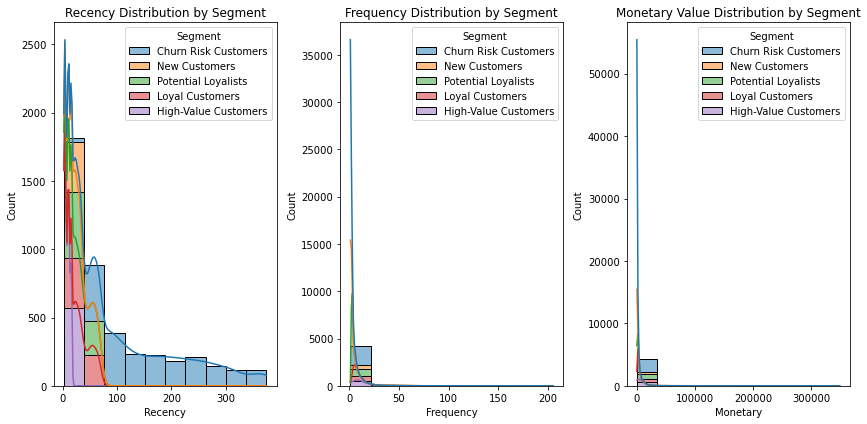

In [144]:
# Histograms by Segment
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(data=rfm, x='Recency', hue='Segment', multiple='stack', bins=10, kde=True)
plt.title('Recency Distribution by Segment')

plt.subplot(1, 3, 2)
sns.histplot(data=rfm, x='Frequency', hue='Segment', multiple='stack', bins=10, kde=True)
plt.title('Frequency Distribution by Segment')

plt.subplot(1, 3, 3)
sns.histplot(data=rfm, x='Monetary', hue='Segment', multiple='stack', bins=10, kde=True)
plt.title('Monetary Value Distribution by Segment')

plt.tight_layout()
plt.show()

In [152]:
rfm.to_csv("rfm_segmented.csv")